In [79]:
import pandas as pd
import league_data_fetcher
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pickle

In [92]:
fpl = league_data_fetcher.Fetcher(0.01, 62649, 2)
#with open(r"fpl_obj_league_62649_gw_2.pickle", "rb") as input_file:
    #fpl = pickle.load(input_file)

In [93]:
df_dict = {}

df_dict['team_name'] = [v.team_name for v in fpl.team_dict.values()]
df_dict['entry'] = [v.entry for v in fpl.team_dict.values()]
df_dict['country'] = [v.country for v in fpl.team_dict.values()]
df_dict['total_points'] = [v.aggregate('total_points', 'sum') for v in fpl.team_dict.values()]
df_dict['was_home'] = [v.aggregate('was_home', 'sum') for v in fpl.team_dict.values()]
df_dict['minutes'] = [v.aggregate('minutes', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_scored'] = [v.aggregate('goals_scored', 'sum') for v in fpl.team_dict.values()]
df_dict['assists'] = [v.aggregate('assists', 'sum') for v in fpl.team_dict.values()]
df_dict['clean_sheets'] = [v.aggregate('clean_sheets', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_conceded'] = [v.aggregate('goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['own_goals'] = [v.aggregate('own_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_saved'] = [v.aggregate('penalties_saved', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_missed'] = [v.aggregate('penalties_missed', 'sum') for v in fpl.team_dict.values()]
df_dict['yellow_cards'] = [v.aggregate('yellow_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['red_cards'] = [v.aggregate('red_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['saves'] = [v.aggregate('saves', 'sum') for v in fpl.team_dict.values()]
df_dict['bonus'] = [v.aggregate('bonus', 'sum') for v in fpl.team_dict.values()]
df_dict['bps'] = [v.aggregate('bps', 'sum') for v in fpl.team_dict.values()]
df_dict['influence'] = [v.aggregate('influence', 'sum') for v in fpl.team_dict.values()]
df_dict['creativity'] = [v.aggregate('creativity', 'sum') for v in fpl.team_dict.values()]
df_dict['threat'] = [v.aggregate('threat', 'sum') for v in fpl.team_dict.values()]
df_dict['ict_index'] = [v.aggregate('ict_index', 'sum') for v in fpl.team_dict.values()]
df_dict['starts'] = [v.aggregate('starts', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals'] = [v.aggregate('expected_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_assists'] = [v.aggregate('expected_assists', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goal_involvements'] = [v.aggregate('expected_goal_involvements', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals_conceded'] = [v.aggregate('expected_goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['value'] = [v.aggregate('value', 'sum') for v in fpl.team_dict.values()]
df_dict['xp'] = [v.aggregate('xp', 'sum') for v in fpl.team_dict.values()]
df_dict['wrc'] = [v.aggregate('wrc', 'sum') for v in fpl.team_dict.values()]

sum_wrl = sum([player.wrl for player in fpl.player_dict.values()])

def scale_to_0_1(lst):
    min_val = min(lst)
    max_val = max(lst)
    scaled_lst = [(val - min_val) / (max_val - min_val) for val in lst]
    return scaled_lst

df_dict['wrl'] = [sum_wrl - v.aggregate('wrl', 'sum') for v in fpl.team_dict.values()]
df_dict['wrc_ratio'] = list(np.array(df_dict['wrc']) / np.array(df_dict['wrl']))

In [94]:
df = pd.DataFrame(df_dict)

In [95]:
df

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
0,Ellas Artilleri,2187498,Sweden,73,8,1196,6,2,6,11,...,15,5.03,1.85,6.88,10.47,1002,75.0,48.371426,36.681514,1.318687
1,Vitsvart,3999239,Sweden,99,6,1091,8,3,5,10,...,13,5.93,1.91,7.84,12.75,983,89.5,61.757147,35.567235,1.736349
2,MR T,1823816,Sweden,74,5,1177,5,3,5,12,...,14,3.80,1.45,5.25,15.79,1005,93.0,60.899854,31.209942,1.951297
3,Mount Rashmore,1096517,Sweden,65,5,1037,3,3,7,9,...,12,3.84,1.57,5.41,14.84,999,79.0,40.641732,24.951819,1.628808
4,SIF till femman,204229,Sweden,62,5,1205,3,3,5,15,...,13,2.71,1.98,4.69,21.45,993,81.5,45.081384,26.891472,1.676419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,Mumin BK,8351573,Sweden,36,9,1010,1,0,4,13,...,11,2.32,0.72,3.03,19.81,999,45.5,35.015188,52.825276,0.662849
6153,Yyyyyyyyjgt,8459267,Sweden,54,8,1075,3,2,4,12,...,12,2.65,0.62,3.27,21.39,809,92.5,76.546865,47.356953,1.616381
6154,Azu,8518940,Sweden,28,7,911,1,0,3,13,...,10,4.15,1.59,5.74,14.01,1001,40.5,20.673571,43.483658,0.475433
6155,Sideshow Bob´s,8273213,Sweden,25,9,801,1,0,4,8,...,10,2.89,1.00,3.89,10.01,962,50.0,35.657326,48.967414,0.728185


In [86]:
df.to_pickle('league_62649_gw_1.pickle')

In [67]:
#import pickle
#with open('fpl_obj_league_62649_gw_2.pickle', 'wb') as f:
#    pickle.dump(fpl, f)

In [68]:
sns.set(rc={'figure.figsize':(16,9), "figure.dpi":300, 'savefig.dpi':300})

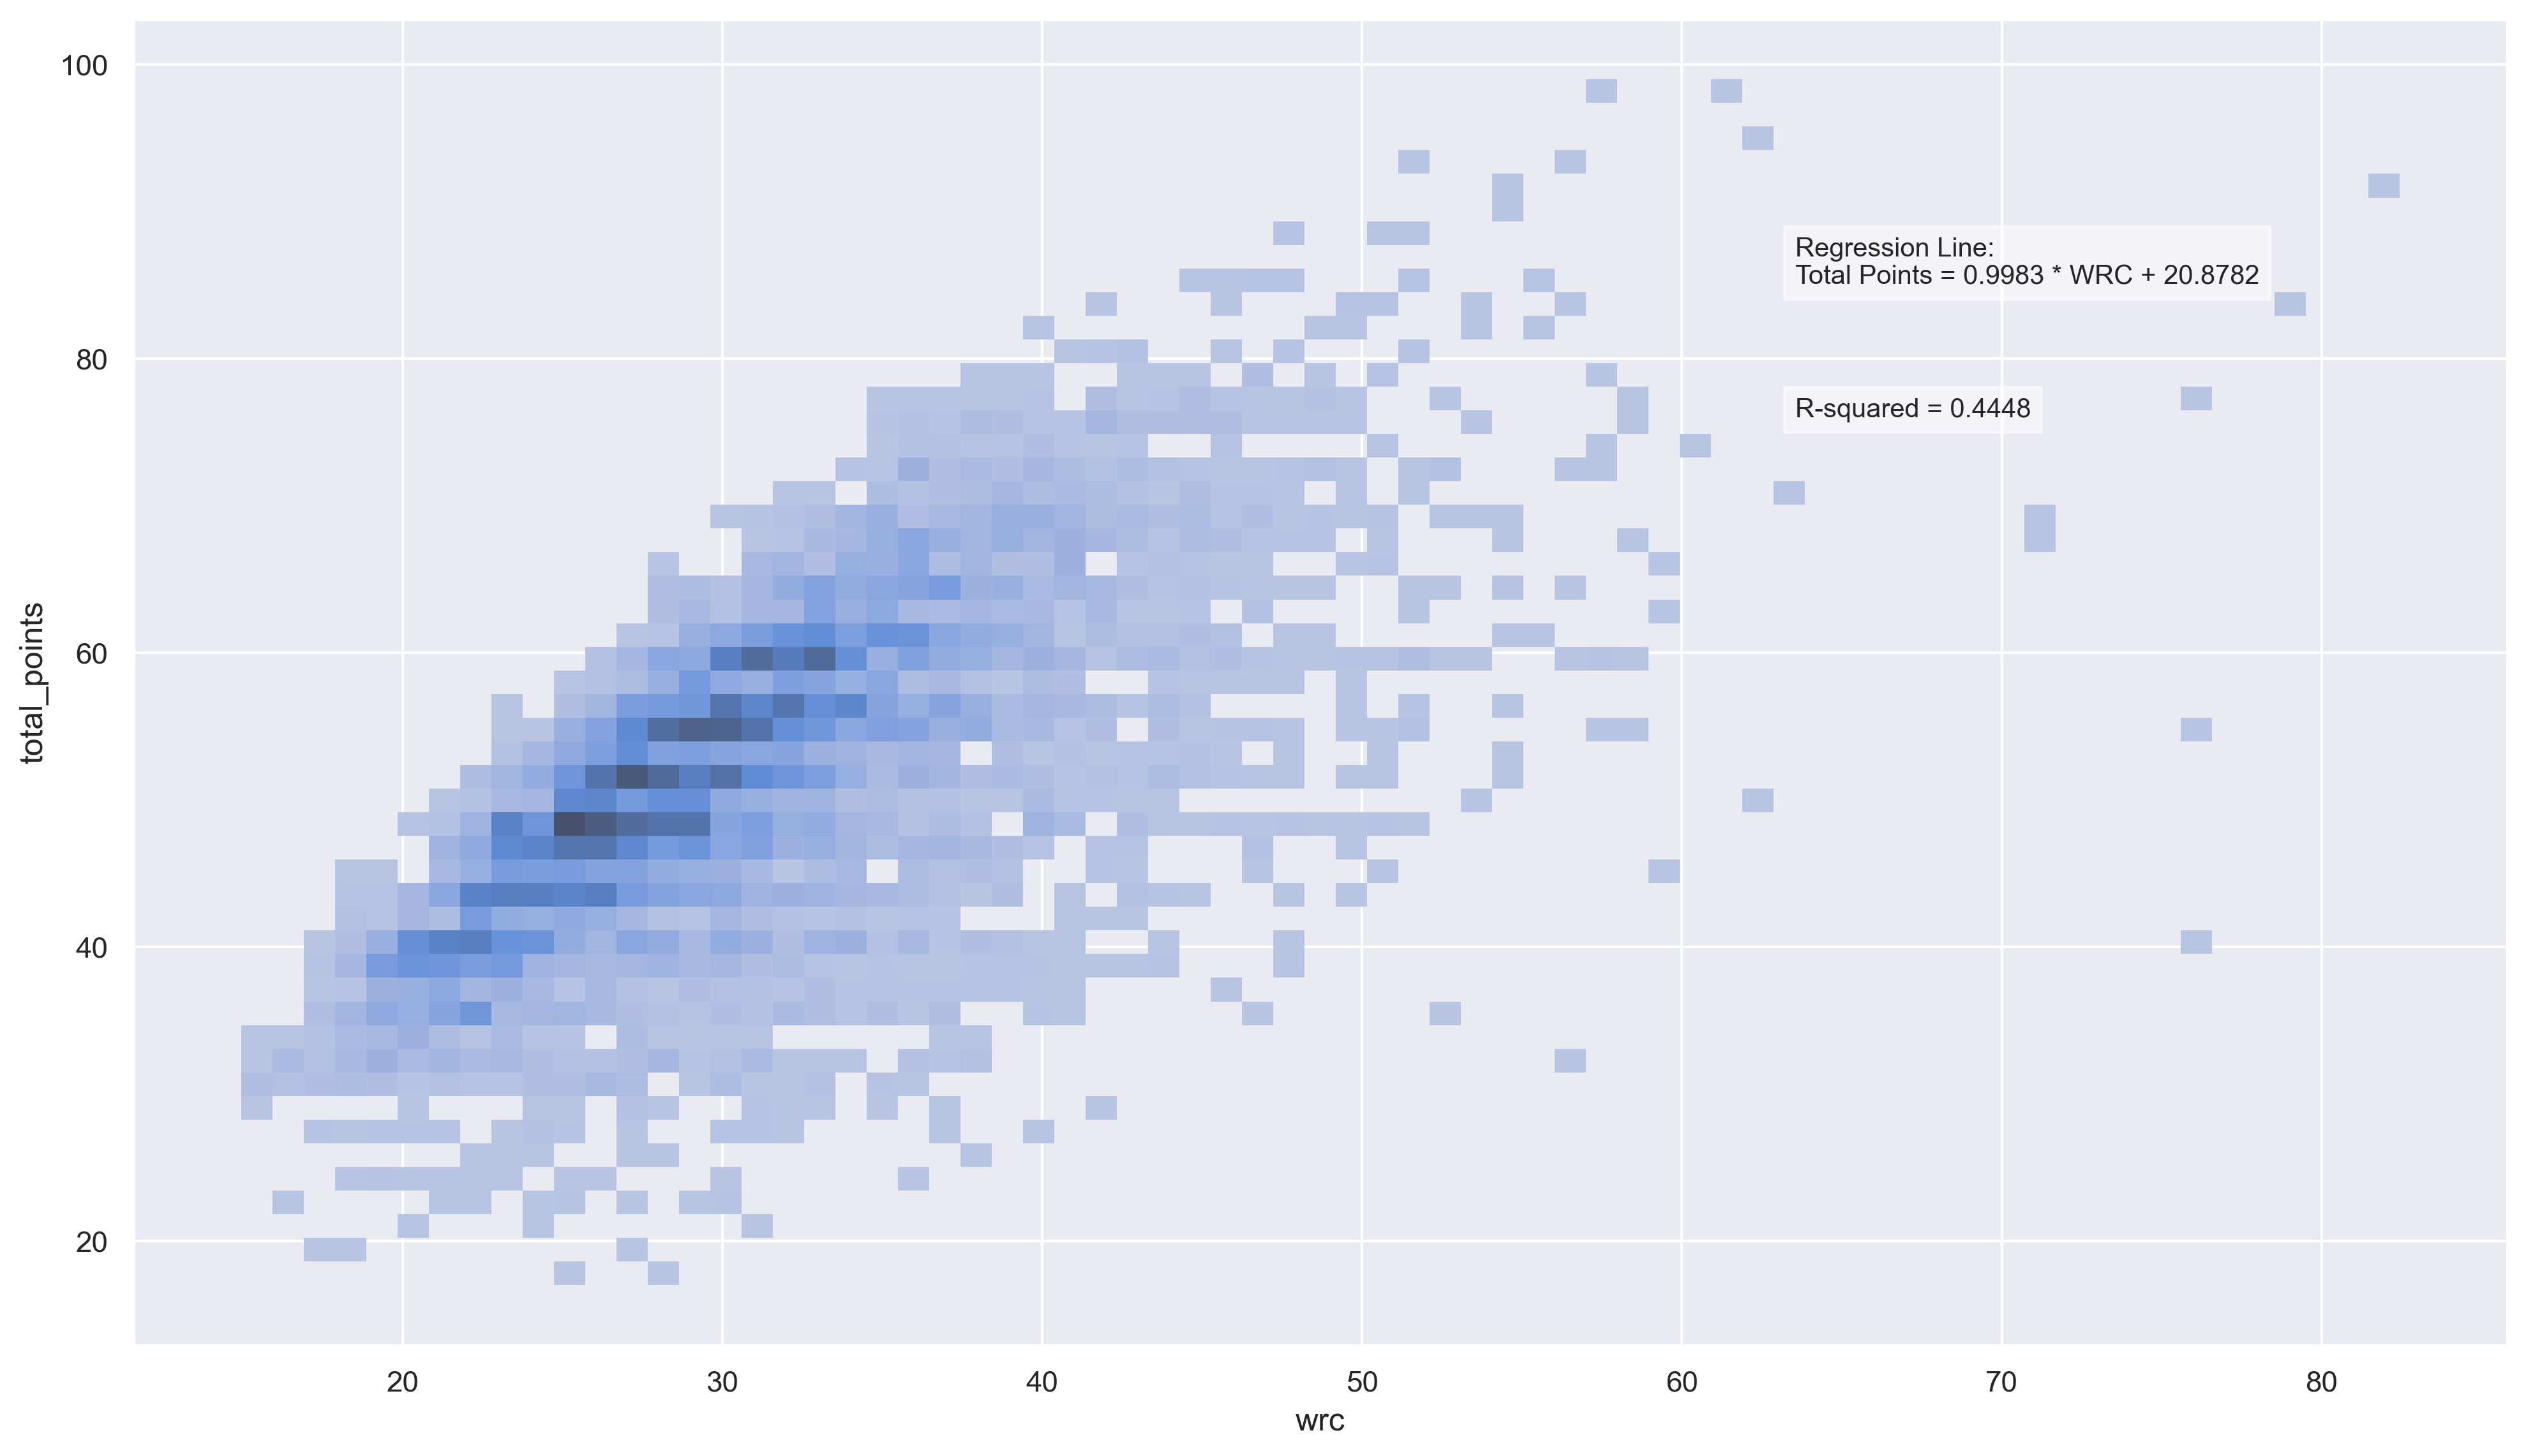

In [102]:
sns.histplot(data=df, x='wrc', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

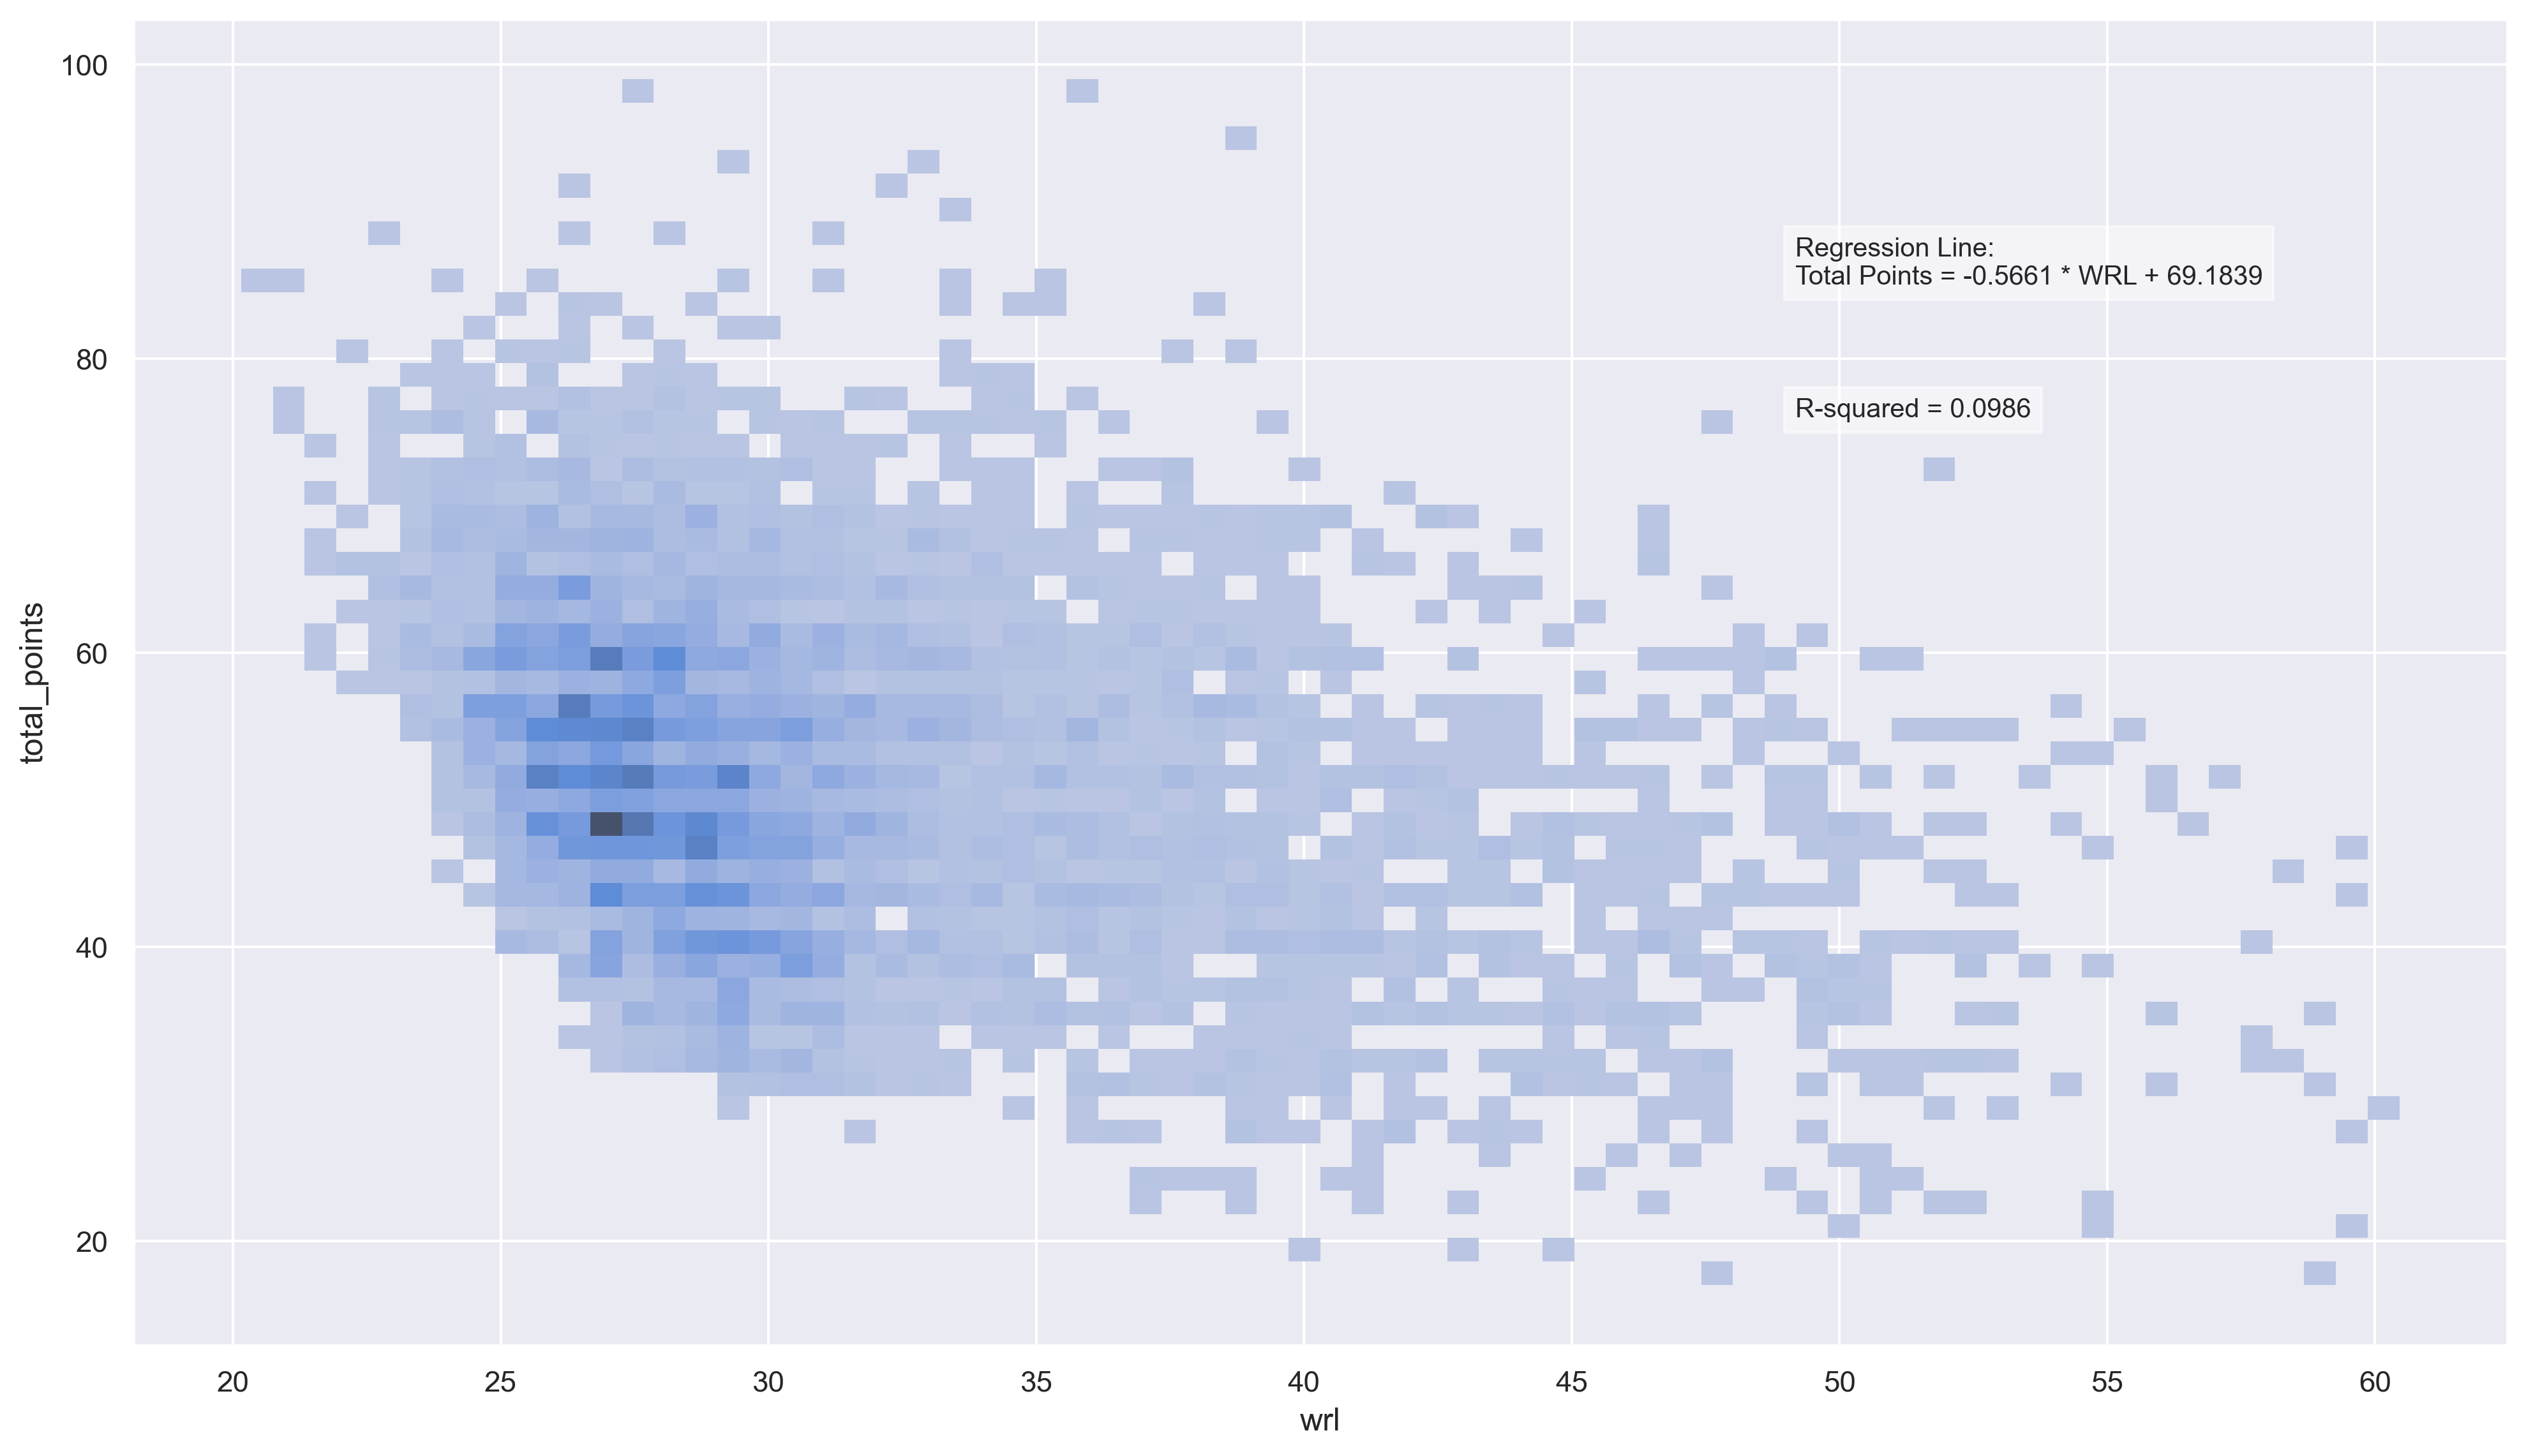

In [103]:
sns.histplot(data=df, x='wrl', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrl'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRL + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

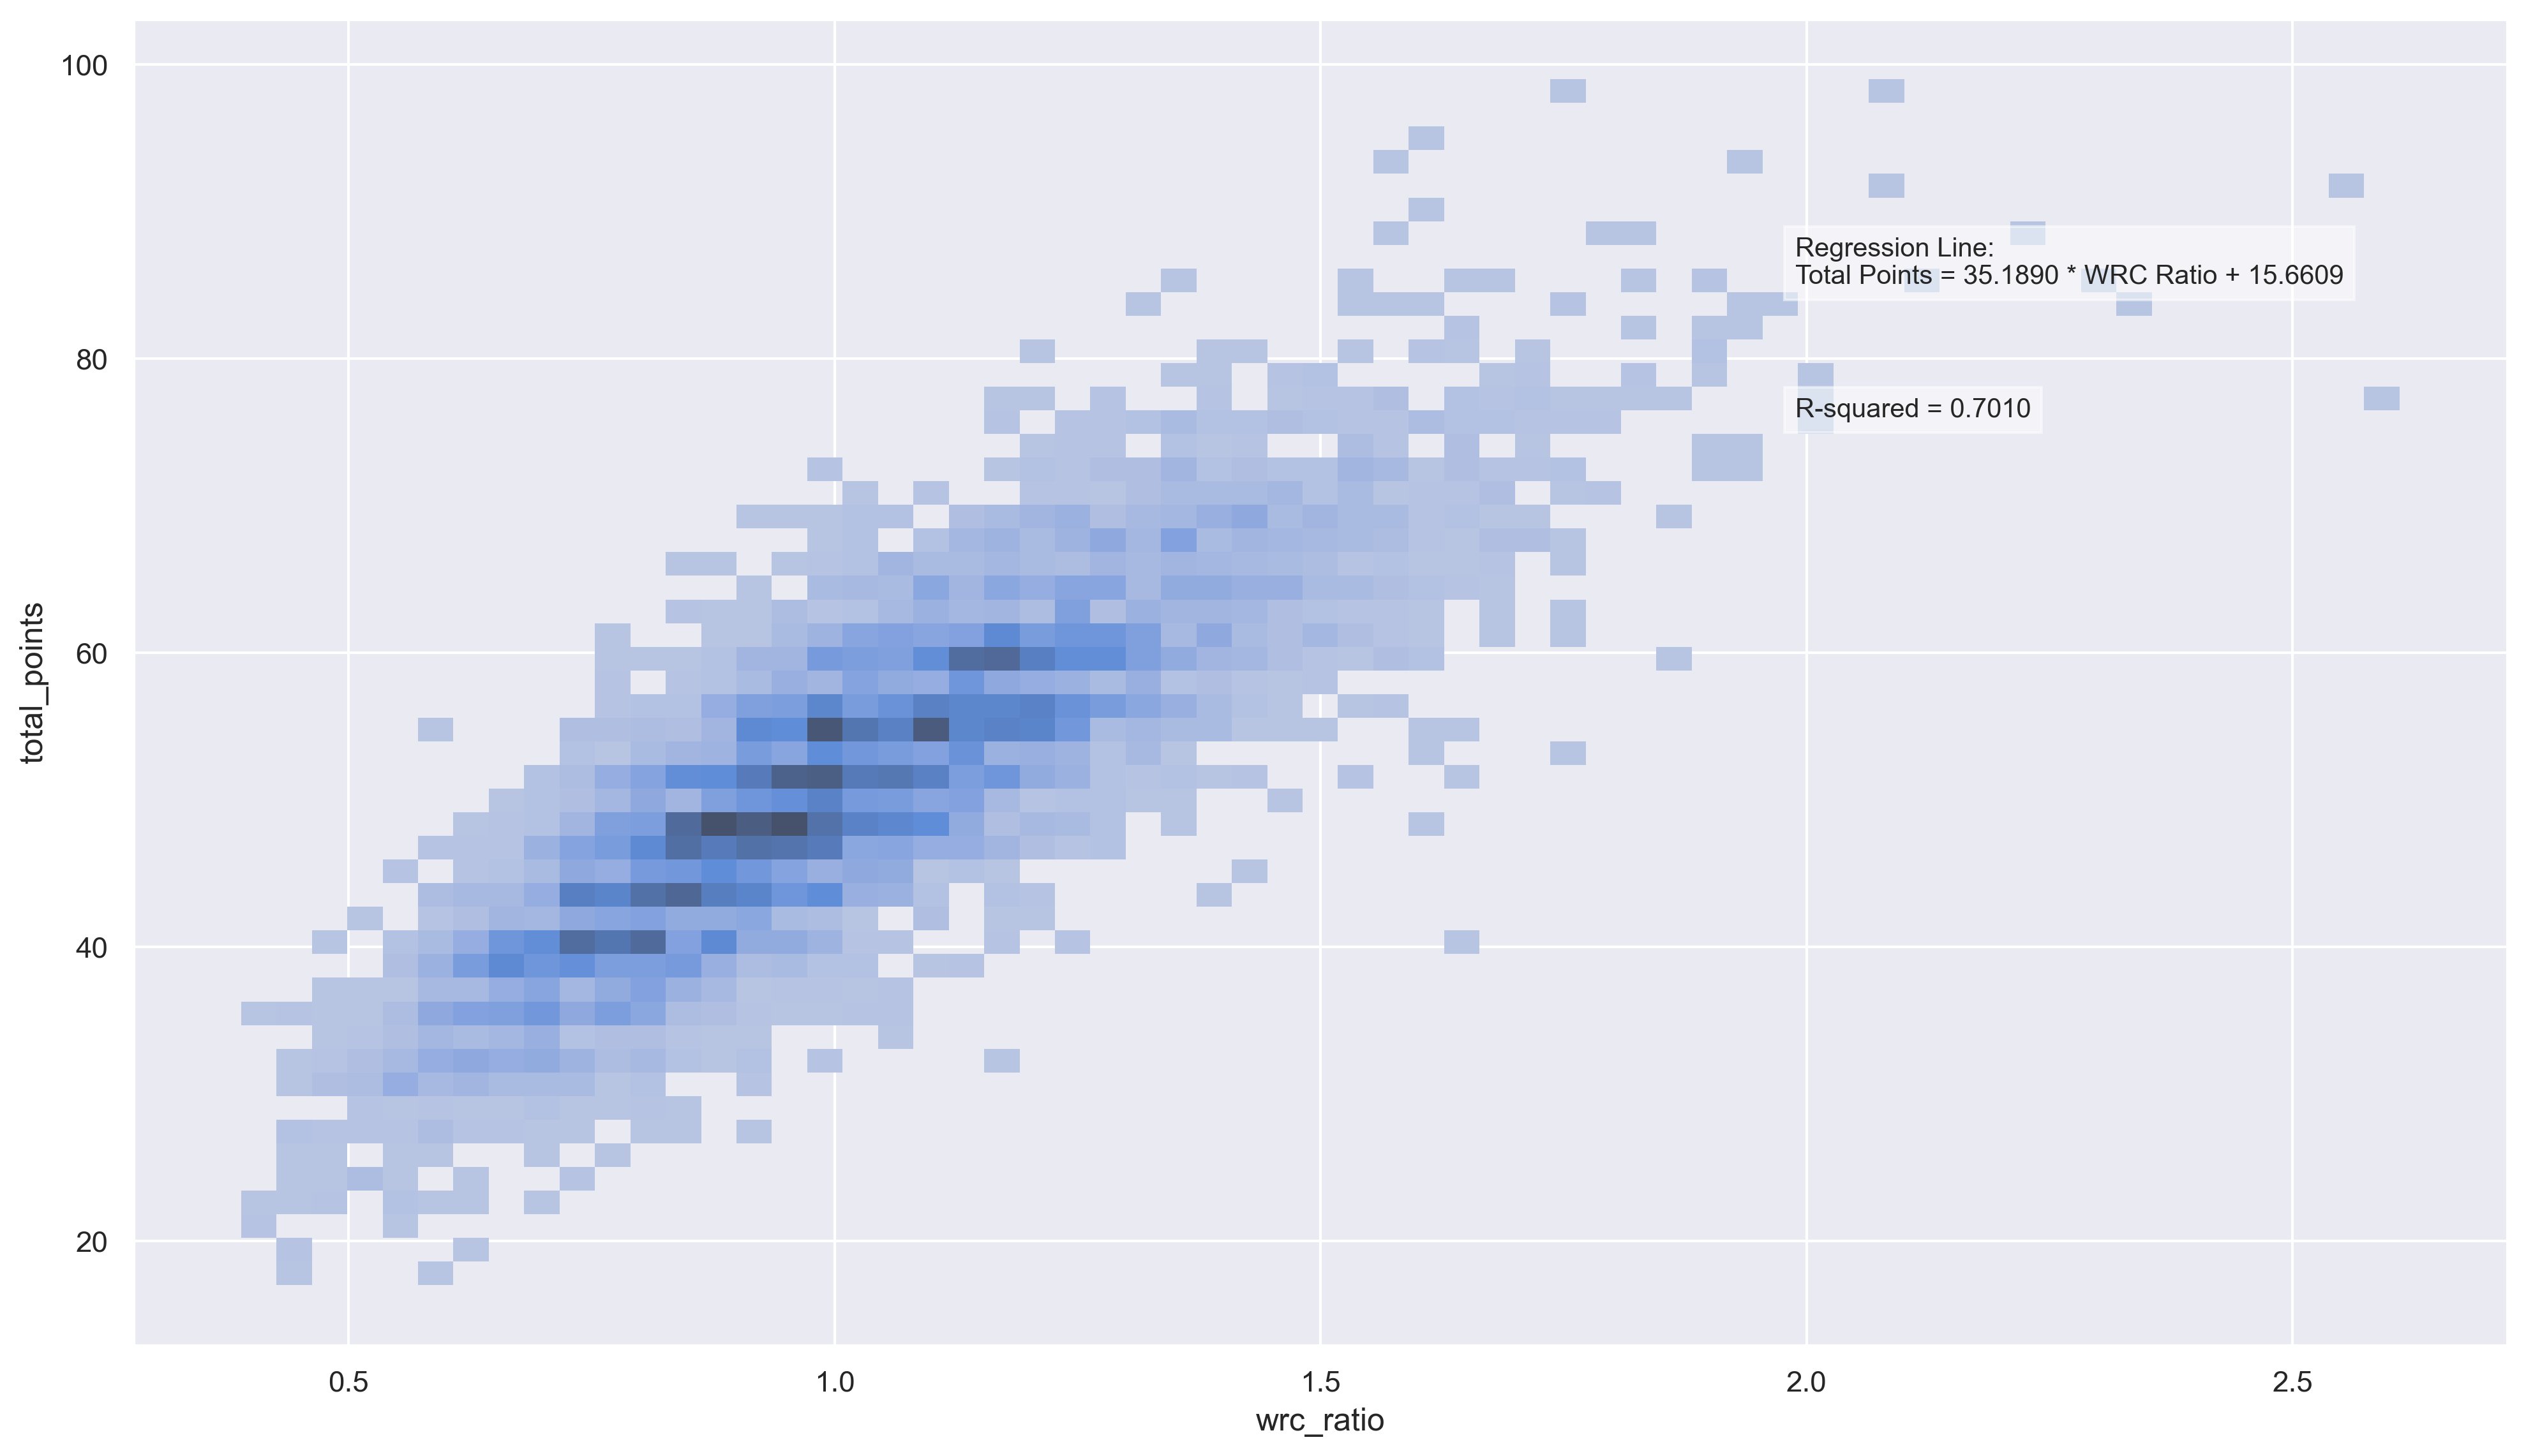

In [104]:
sns.histplot(data=df, x='wrc_ratio', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc_ratio'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC Ratio + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [96]:
df[df['entry'].isin([82846, 15644, 21482])]

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
1798,Pick of Destiny,82846,Sweden,56,5,1076,3,2,6,10,...,13,4.42,1.61,6.03,15.11,958,65.5,29.418047,27.228135,1.080428
3313,El grande mums!,15644,Sweden,51,3,1009,4,1,4,15,...,11,4.95,1.95,6.90,16.10,948,64.0,26.891326,26.201413,1.026331
5293,Finnboda Hotspur FC,21482,Sweden,49,7,1034,0,2,6,10,...,12,1.68,1.40,3.08,17.60,937,60.5,35.645630,38.455718,0.926927


In [128]:
dict_wr = {}
dict_wr['wrc'] = [v.wrc for v in fpl.player_dict.values()]
dict_wr['wrl'] = [v.wrl for v in fpl.player_dict.values()]
dict_wr['first_name'] = [v.first_name for v in fpl.player_dict.values()]
dict_wr['second_name'] = [v.second_name for v in fpl.player_dict.values()]
dict_wr['position'] = [v.position for v in fpl.player_dict.values()]
dict_wr['team_name'] = [v.team_name for v in fpl.player_dict.values()]
dict_wr['value'] = [v.value for v in fpl.player_dict.values()]

df_wr = pd.DataFrame(dict_wr)
df_wr['wrc_ratio'] = df_wr['wrc'] / df_wr['wrl']

In [130]:

df_wr = df_wr.sort_values(by='wrl', ascending=False)
df_wr[df_wr['wrc_ratio'] < 10]

,wrc,wrl,first_name,second_name,position,team_name,value,wrc_ratio
2,1.201754,7.798246,Pervis,Estupiñán,DEF,Brighton,51,0.154106
0,0.244314,7.755686,Erling,Haaland,FWD,Man City,140,0.031501
1,0.683398,6.316602,Bukayo,Saka,MID,Arsenal,86,0.108191
9,5.549301,2.950699,Kaoru,Mitoma,MID,Brighton,65,1.880674
4,1.571150,2.428850,Ben,Chilwell,DEF,Chelsea,56,0.646870
3,0.643762,2.356238,Marcus,Rashford,MID,Man Utd,90,0.273216
23,9.181693,2.318307,Bryan,Mbeumo,MID,Brentford,65,3.960516
10,3.930799,2.069201,André,Onana,GOAL,Man Utd,50,1.899670
15,5.137427,1.862573,Martin,Ødegaard,MID,Arsenal,85,2.758242
7,1.637427,1.862573,João Pedro,Junqueira de Jesus,FWD,Brighton,55,0.879121


In [120]:

from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpInteger

# Define position limits
position_limits = {
    'GOAL': (1, 1),
    'DEF': (3, 5),
    'MID': (3, 5),
    'FWD': (1, 3)
}

# Define team budget constraints
budget_min = 800
budget_max = 834

# Define wrc_ratio mean constraints
wrc_ratio_mean_min = 1.8
wrc_ratio_mean_max = 2.1

# Create a linear programming problem
prob = LpProblem("FantasyTeamSelection", LpMaximize)

# Create binary decision variables for each player
player_vars = LpVariable.dicts("Player", range(len(df)), 0, 1, LpInteger)

# Add the objective function (maximize wrc_ratio_mean)
prob += lpSum(df_wr.iloc[i]['wrc_ratio'] * player_vars[i] for i in range(len(df_wr)))

# Add the budget constraint
prob += lpSum(df_wr.iloc[i]['value'] * player_vars[i] for i in range(len(df_wr))) <= budget_max
prob += lpSum(df_wr.iloc[i]['value'] * player_vars[i] for i in range(len(df_wr))) >= budget_min

# Add the wrc_ratio mean constraint
prob += lpSum(df_wr.iloc[i]['wrc_ratio'] * player_vars[i] for i in range(len(df_wr))) >= wrc_ratio_mean_min * lpSum(player_vars)
prob += lpSum(df_wr.iloc[i]['wrc_ratio'] * player_vars[i] for i in range(len(df_wr))) <= wrc_ratio_mean_max * lpSum(player_vars)

# Add the position constraints
for position, (min_count, max_count) in position_limits.items():
    prob += lpSum(player_vars[i] for i in range(len(df_wr)) if df_wr.iloc[i]['position'] == position) >= min_count
    prob += lpSum(player_vars[i] for i in range(len(df_wr)) if df_wr.iloc[i]['position'] == position) <= max_count

# Solve the problem
prob.solve()

# Get the indices of the selected players
selected_player_indices = [i for i in range(len(df_wr)) if player_vars[i].value() == 1]

# Print the selected players
selected_players = df_wr.iloc[selected_player_indices]
print(selected_players)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/filipengstrom/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xr/npr6w19s607489cf8m8351_m0000gn/T/c4f4cce8d0c6425cba3065d7fd8aeb19-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/xr/npr6w19s607489cf8m8351_m0000gn/T/c4f4cce8d0c6425cba3065d7fd8aeb19-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 24771 RHS
At line 24784 BOUNDS
At line 30942 ENDATA
Problem MODEL has 12 rows, 6157 columns and 12414 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 85.3622 - 0.01 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 7 rows, 26 columns (26 integer (25 of which binary)) and 102 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.373665
Cbc00